In [ ]:
import tensorflow as tf
print(tf.__version__)

2.9.2


# Feature Extraction Analysis

Convolutional Neural Networks (CNN) are a type of deep learning architecture specialized in image-related tasks. One of the main benefits from this type of algorithms is the great performance at extracting relevant information from an image in order to classify it. We call "relevant information" the features of the image. Thus, for short, feature extraction is a property from CNNs that highlights meaninful pixels from an image, and discard pixels that don't convey information, or contain redundancies.

# 1. Objective

In this notebook I will try to explore CNN as feature extractors, and I'll investigate how specialization is capable of enhancing feature extraction. More specifically, I will look at the level of specialization of two models with the same architecture, one trained with 10% of the samples in relation to the other, and see qualitatively how they perform.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
saving_direc = '/content/drive/MyDrive/Neural Networks/CNN Feature Extraction/'

# 2. Selecting and absorbing a dataset

The chosen dataset is the Cifar10, a dataset available at Tensorflow that has 50K images for train and 10K images for test, and consists of 32x32 pixels, RGB images distributed in 10 categories. The categories are uniformly distributed in the dataset, which means that throughout this notebook, I chose accuracy to be a relevant metric to look at. 

Bellow I import the data and define my train and test sets:

In [ ]:
from tensorflow.keras.datasets import cifar10

In [ ]:
(train_data, train_labels), (test_data, test_labels) = cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


# 3. Preprocessing data

There are a few of steps to facilitate the job of our classifier. Some processing is required here.

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
# Normalizing the data so the color values lie in the interval [0, 1]:
train_data = train_data / 255.
test_data = test_data / 255.

In [ ]:
# Verifying the shape of our data:
print(train_data.shape)
print(test_data.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


As can be seen above, we have 50K images for training and 10K images for testing of 32x32 pixels, as said before. Additionaly, we have 3 color channels, which accounts for the Red, Blue and Green colors.

For further reference, we can plot one of them bellow. The left-most image has all 3 color channels joined. The subsequent 3 are plots for each color channel separately.

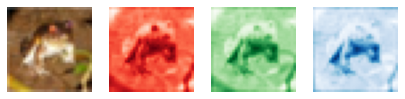

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(7,3))
axs[0].imshow(train_data[0,...])
axs[0].axis('off')
axs[1].imshow(train_data[0,:,:,0], cmap='Reds')
axs[1].axis('off')
axs[2].imshow(train_data[0,:,:,1], cmap='Greens')
axs[2].axis('off')
axs[3].imshow(train_data[0,:,:,2], cmap='Blues')
axs[3].axis('off')
plt.show()

We can also display some labels to see what they look like:

In [ ]:
print(train_labels[:10].T)

[[6 9 9 4 1 1 2 7 8 3]]


These are indexed labels, which is useful for classification, but not particularly enlightning. Let's create a class name for each of these indices.

In [ ]:
#These class names can be referenced in the dataset documentation
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

Now, plotting the first ten images with their respective labels:

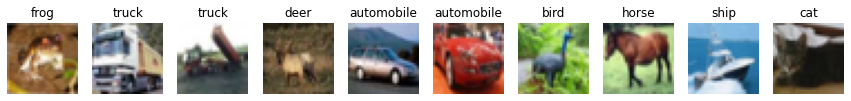

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=10, figsize=(15,7))

for i in range(10):
  axs[i].imshow(train_data[i,...])
  axs[i].title.set_text(class_names[train_labels[i][0]])
  axs[i].axis('off')
plt.show()

Since we'll create a deep learning architecture with 10 units for output layer (one unit for each class), we also have to one-hot-encode these labels for the classifier to work:

In [ ]:
enc = OneHotEncoder()
transformed = enc.fit_transform(train_labels)
train_labels_encoded = transformed.toarray()

Now, we labels will look like this:

In [ ]:
train_labels_encoded[:10]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]])

In [ ]:
#We can do the same thing for the test labels
enc = OneHotEncoder()
transformed = enc.fit_transform(test_labels)
test_labels_encoded = transformed.toarray()

In order to make it easier for the classifier by reducing the amount of data to be processed for each individual image, we can convert the images from RGB to greyscale. In order to do that, we average the color channels for each pixel. 

However, when we average over the color channels, the color dimension disapears. Tensorflow works by deafult with a color dimension, so we have to re-add it with np.newaxis command, which introduces a dummy dimension to our data.

In [ ]:
train_data = np.average(train_data, axis=-1)
test_data = np.average(test_data, axis=-1)

train_data = train_data[...,np.newaxis] 
test_data = test_data[...,np.newaxis]

#We can print the shape of our data to see if it was expected
print(train_data.shape)
print(test_data.shape)

(50000, 32, 32, 1)
(10000, 32, 32, 1)


To see if it actually worked, let's take a look at the data shape and plot the same first 10 figures as above:

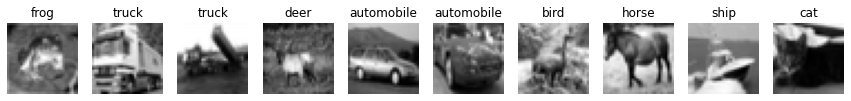

Data shape: (50000, 32, 32, 1)


In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=10, figsize=(15,7))

for i in range(10):
  axs[i].imshow(train_data[i,...].squeeze(), cmap='gray')
  axs[i].title.set_text(class_names[train_labels[i][0]])
  axs[i].axis('off')
plt.show()

print('Data shape:', train_data.shape)

Something worth addressing now is that we need to retain one image from this whole dataset. This one image will serve as a test subject for our feature extraction analysis. To be fair, such image can't be part of the training process of the benchmark classifier, nor the dummy classifier.

In [ ]:
one_image_data = train_data[0,...]

train_data = train_data[1:,...]
train_labels = train_labels[1:,...]
train_labels_encoded = train_labels_encoded[1:,...]

Also, Tensorflow needs the first dimension to be the batch dimension, so in a similar fashion as we did with the color channels, we have to add an extra dummy dimension:

In [ ]:
one_image_data = one_image_data[np.newaxis,...]
print(one_image_data.shape)

(1, 32, 32, 1)


Now let's check if the one_image is the frog, and the first train_data is the truck:

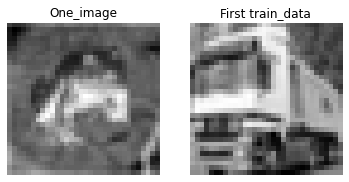

In [ ]:
fig,ax = plt.subplots(nrows=1, ncols=2)

ax[0].imshow(one_image_data.squeeze(), cmap='gray')
ax[0].title.set_text('One_image')
ax[0].axis('off')
ax[1].imshow(train_data[0,...].squeeze(), cmap='gray')
ax[1].title.set_text('First train_data')
ax[1].axis('off')

plt.show()

Ok, now that we have reserved our frog image for feature extraction analysis, we can start assembling our neural networks.

# 4. Building the CNN

First I will import the necessary modules to build the CNN.

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPool2D, Dense, Dropout, Flatten
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

Now, let's try to build a model consisting of 13 layers, of which:
- 0th: input layer
- 1st and 2nd: Conv2D with 16 filters and 3x3 kernel size, ReLU activation function
- 3th: MaxPool with pool size 2x2

We repeat this process three times. Then,

- 9th: Dense layer with 64 units and softmax activation function.
- 10th: Dropout layer with rate 0.5.
- 11th: a Flatten layer.
- 12th: Dense layer with 10 units, softmax activation function for classification.

The model will be compiled with an Adam optimizer, using as loss function the categorical cross entropy and, since the labels are hot-encoded, I'll use a simple accuracy metric.

In [ ]:
def get_new_model(input_shape):
  '''
  This function returns a compiled CNN with specifications given above.
  '''

  input_layer = Input(shape=input_shape, name='input')
  h = Conv2D(filters=16, kernel_size=(3,3), 
             activation='relu', padding='same', name='conv2d_1')(input_layer)
  h = Conv2D(filters=16, kernel_size=(3,3), 
             activation='relu', padding='same', name='conv2d_2')(h)

  h = MaxPool2D(pool_size=(2,2), name='pool_1')(h)

  h = Conv2D(filters=16, kernel_size=(3,3), 
             activation='relu', padding='same', name='conv2d_3')(h)
  h = Conv2D(filters=16, kernel_size=(3,3), 
             activation='relu', padding='same', name='conv2d_4')(h)

  h = MaxPool2D(pool_size=(2,2), name='pool_2')(h)

  h = Conv2D(filters=16, kernel_size=(3,3), 
             activation='relu', padding='same', name='conv2d_5')(h)
  h = Conv2D(filters=16, kernel_size=(3,3), 
             activation='relu', padding='same', name='conv2d_6')(h)
    
  h = Dense(64, activation='relu', name='dense_1')(h)
  h = Dropout(0.5, name='dropout_1')(h)
  h = Flatten(name='flatten_1')(h)
  output_layer = Dense(10, activation='softmax', name='dense_2')(h)

  model = Model(inputs=input_layer, outputs=output_layer, name='model_CNN')

  model.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
  
  return model

In [ ]:
model_benchmark = get_new_model(input_shape=(32,32,1))
model_benchmark.summary()

Model: "model_CNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 32, 32, 1)]       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 16)        160       
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 16)        2320      
                                                                 
 pool_1 (MaxPooling2D)       (None, 16, 16, 16)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 16)        2320      
                                                                 
 conv2d_4 (Conv2D)           (None, 16, 16, 16)        2320      
                                                                 
 pool_2 (MaxPooling2D)       (None, 8, 8, 16)          0 

This will be a long-time training NN, therefore I will stablish a checkpoint callback for the best epoch, monitoring the validation set accuracy. In addition to that, I will also add an EarlyStopping callback that will monitor the validation set accuracy, with patience parameter set to 5.

In [ ]:
def get_checkpoint_best_epoch(filepath):
  checkpoint_path = filepath
  checkpoint = ModelCheckpoint(filepath=checkpoint_path,
                               save_weights_only=True,
                               save_best_only=True,
                               save_freq='epoch',
                               monitor='val_accuracy',
                               verbose=0)
  return checkpoint


def get_early_stopping():
  callback = EarlyStopping(monitor='val_accuracy', patience=5)
  return callback

In [ ]:
checkpoint_best_epoch = get_checkpoint_best_epoch(f'{saving_direc}Checkpoint_best_epoch_benchmark/checkpoint')
early_stopping = get_early_stopping()

Now, for training: there will be 30 epochs, with validation set being the test set, and the provided callbacks. This training code will be executed only once. When the training is over and the weights of the model are tunned and saved, we can just load them whenever we want to recover the trained model.

In [ ]:
callbacks = [checkpoint_best_epoch, early_stopping]

history_benchmark = model_benchmark.fit(x=train_data,
                                        y=train_labels_encoded,
                                        epochs=50,batch_size=100,
                                        validation_data=(test_data,test_labels_encoded),
                                        callbacks=callbacks)

Epoch 1/50
500/500 [==============================] - 126s 252ms/step - loss: 0.6679 - accuracy: 0.7644 - val_loss: 0.7894 - val_accuracy: 0.7294
Epoch 2/50
500/500 [==============================] - 129s 257ms/step - loss: 0.6621 - accuracy: 0.7652 - val_loss: 0.8274 - val_accuracy: 0.7181
Epoch 3/50
500/500 [==============================] - 127s 253ms/step - loss: 0.6610 - accuracy: 0.7676 - val_loss: 0.7994 - val_accuracy: 0.7319
Epoch 4/50
500/500 [==============================] - 129s 257ms/step - loss: 0.6573 - accuracy: 0.7689 - val_loss: 0.7852 - val_accuracy: 0.7316
Epoch 5/50
500/500 [==============================] - 126s 251ms/step - loss: 0.6553 - accuracy: 0.7690 - val_loss: 0.8173 - val_accuracy: 0.7191
Epoch 6/50
500/500 [==============================] - 128s 256ms/step - loss: 0.6475 - accuracy: 0.7735 - val_loss: 0.7983 - val_accuracy: 0.7285
Epoch 7/50
500/500 [==============================] - 125s 250ms/step - loss: 0.6511 - accuracy: 0.7703 - val_loss: 0.7958 -

We can use the history variable created to access the evolution of the loss function and the accuracy during the epochs:

In [ ]:
#Using the history method we can convert the history object created into
#a Pandas dataframe
df_benchmark = pd.DataFrame(history_benchmark.history)
df_benchmark.head()

,loss,accuracy,val_loss,val_accuracy
0,0.667899,0.764415,0.789441,0.7294
1,0.662114,0.765235,0.827421,0.7181
2,0.661000,0.767575,0.799365,0.7319
3,0.657292,0.768915,0.785238,0.7316
4,0.655326,0.769015,0.817274,0.7191


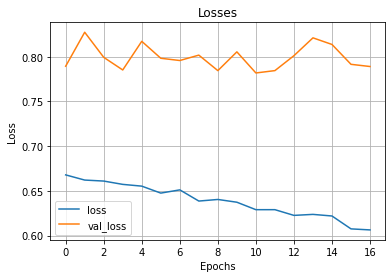

In [ ]:
df_benchmark['loss'].plot(legend=True)
df_benchmark['val_loss'].plot(title='Losses', grid=True,
                              xlabel='Epochs',
                              ylabel='Loss',
                              legend=True)

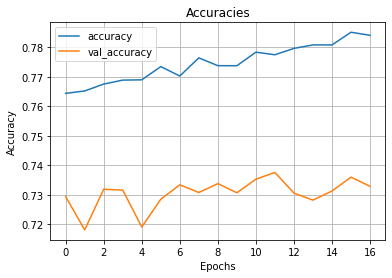

In [ ]:
df_benchmark['accuracy'].plot(legend=True)
df_benchmark['val_accuracy'].plot(title='Accuracies', grid=True,
                              xlabel='Epochs',
                              ylabel='Accuracy',
                              legend=True)

We can see a discrepancy of the losses and the accuracy between the train and validation sets. The loss function shows a discrepancy a little higher than I anticipated, but this will do for now. The accuracies are within the expected, since the scale of the image provides a false sensation of a validation set much worse than the training set, but they are close in performance.

Also, something worth noticing is that these metrics don't seem to improve much during training. This is because I had previously trained the model and had to stop the training step, and re-start it later. The actual training took more than 20 epochs and improved a lot in its course.

Now, creating a new benchmark model with tunned parameters is easy, since we just have to load the trained weights:

In [ ]:
model_benchmark = get_new_model(input_shape=train_data.shape[1:])
model_benchmark.load_weights(filepath=f'{saving_direc}Checkpoint_best_epoch_benchmark/checkpoint')

# 5. Dummy CNN

Now I will focus on a second CNN, which will be a CNN with same architecture as our benchmark, but will be trained with significantly less data.

Creating a new model is as easy as calling the get_new_model function. However, we need to take care of our data first.

## 5.1 Taking care of our data first

The cifar10 database says in its documentation that the labels are uniformly distributed, e.g. this is a balanced dataset. Let's confirm that:

In [ ]:
unique_train, counts_train = np.unique(train_labels, return_counts=True)
unique_test, counts_test = np.unique(test_labels, return_counts=True)

print('Train set:',dict(zip(unique_train, counts_train)))
print('Test set:',dict(zip(unique_test, counts_test)))

Train set: {0: 5000, 1: 5000, 2: 5000, 3: 5000, 4: 5000, 5: 5000, 6: 4999, 7: 5000, 8: 5000, 9: 5000}
Test set: {0: 1000, 1: 1000, 2: 1000, 3: 1000, 4: 1000, 5: 1000, 6: 1000, 7: 1000, 8: 1000, 9: 1000}


As we can see, the distribution of labels is perfectly uniform, with the exception of the frog (label 6) we retained for analysis. We need to preserve that for our "dummy" classifier. Instead of subsampling our train data and try to replicate the proportions, I will simply use the test data to train the dummy model, and then use the train data to test it. Since the database is the same, we don't have a problem with the nature of the data used, and we benefit from a training dataset that contains 10% of the images present in the benchmark classifier.

In [ ]:
#Redefining the test to be train, and vice versa:

train_data_dummy = test_data
train_labels_encoded_dummy = test_labels_encoded

test_data_dummy = train_data
test_labels_encoded_dummy = train_labels_encoded

In [ ]:
print(train_data_dummy.shape)
print(test_data_dummy.shape)

(10000, 32, 32, 1)
(49999, 32, 32, 1)


## 5.2 Training the dummy CNN

Now I will build a compiled CNN model with same architecture as the benchmark, and train it exactly with the same parameters as before.

In [ ]:
model_dummy = get_new_model(input_shape=train_data_dummy.shape[1:])
model_dummy.summary()

Model: "model_CNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 32, 32, 1)]       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 16)        160       
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 16)        2320      
                                                                 
 pool_1 (MaxPooling2D)       (None, 16, 16, 16)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 16)        2320      
                                                                 
 conv2d_4 (Conv2D)           (None, 16, 16, 16)        2320      
                                                                 
 pool_2 (MaxPooling2D)       (None, 8, 8, 16)          0 

In [ ]:
checkpoint_best_epoch = get_checkpoint_best_epoch(f'{saving_direc}Checkpoint_best_epoch_dummy/checkpoint')
early_stopping = get_early_stopping()

In [ ]:
callbacks = [checkpoint_best_epoch, early_stopping]

history_dummy = model_dummy.fit(x=train_data_dummy,
                                y=train_labels_encoded_dummy,
                                epochs=50,
                                batch_size=100,
                                validation_data=(test_data_dummy,test_labels_encoded_dummy),
                                callbacks=callbacks)

Epoch 1/50
100/100 [==============================] - 55s 541ms/step - loss: 2.1473 - accuracy: 0.2014 - val_loss: 1.9539 - val_accuracy: 0.2924
Epoch 2/50
100/100 [==============================] - 56s 566ms/step - loss: 1.8619 - accuracy: 0.3306 - val_loss: 1.7821 - val_accuracy: 0.3593
Epoch 3/50
100/100 [==============================] - 58s 585ms/step - loss: 1.6917 - accuracy: 0.3913 - val_loss: 1.6289 - val_accuracy: 0.4137
Epoch 4/50
100/100 [==============================] - 54s 542ms/step - loss: 1.6204 - accuracy: 0.4190 - val_loss: 1.5964 - val_accuracy: 0.4293
Epoch 5/50
100/100 [==============================] - 52s 519ms/step - loss: 1.5444 - accuracy: 0.4443 - val_loss: 1.5228 - val_accuracy: 0.4594
Epoch 6/50
100/100 [==============================] - 56s 564ms/step - loss: 1.4914 - accuracy: 0.4707 - val_loss: 1.5191 - val_accuracy: 0.4576
Epoch 7/50
100/100 [==============================] - 51s 518ms/step - loss: 1.4475 - accuracy: 0.4866 - val_loss: 1.4832 - val_ac

In [ ]:
df_dummy = pd.DataFrame(history_dummy.history)
df_dummy.head()

,loss,accuracy,val_loss,val_accuracy
0,2.147257,0.2014,1.953896,0.292386
1,1.861860,0.3306,1.782106,0.359347
2,1.691717,0.3913,1.628928,0.413668
3,1.620391,0.4190,1.596420,0.429349
4,1.544360,0.4443,1.522831,0.459389


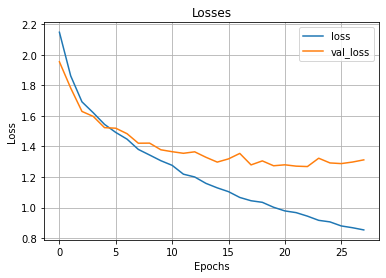

In [ ]:
df_dummy['loss'].plot(legend=True)
df_dummy['val_loss'].plot(title='Losses', grid=True,
                              xlabel='Epochs',
                              ylabel='Loss',
                              legend=True)

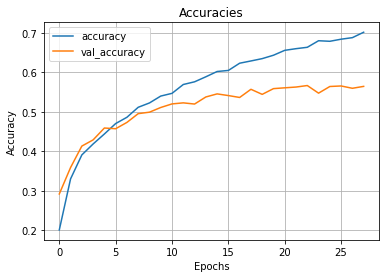

In [ ]:
df_dummy['accuracy'].plot(legend=True)
df_dummy['val_accuracy'].plot(title='Accuracies', grid=True,
                              xlabel='Epochs',
                              ylabel='Accuracy',
                              legend=True)

We see a different evolution in relation to the benchmark classifier. This is because I didn't have to stop the training process in the middle of it. Now we can clearly see the improvement of the metrics over the epochs.

Also, the performance of the dummy classifier is clearly worse than the benchmark, so certainly these are statistically different classifiers.

In [ ]:
model_dummy.load_weights(f'{saving_direc}Checkpoint_best_epoch_dummy/checkpoint')

# 6. Feature extraction
Now that we have our two models: one benchmark and one "dummy" that performs sensibly worse than the benchmark, we can see how both of these perform on feature extraction. We'll be looking at some key layers and comparing them.

## 6.2 Analysis of the benchmark classifier

In [ ]:
model_benchmark.summary()

Model: "model_CNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 32, 32, 1)]       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 16)        160       
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 16)        2320      
                                                                 
 pool_1 (MaxPooling2D)       (None, 16, 16, 16)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 16)        2320      
                                                                 
 conv2d_4 (Conv2D)           (None, 16, 16, 16)        2320      
                                                                 
 pool_2 (MaxPooling2D)       (None, 8, 8, 16)          0 

Here I'm slicing the layers of the CNN and looking at their outputs. I can create a Model that return each layer's output.

In [ ]:
benchmark_layers = model_benchmark.layers
benchmark_input = model_benchmark.input

layer_outputs_benchmark = [layer.output for layer in benchmark_layers]
features_benchmark = Model(inputs=benchmark_input, outputs=layer_outputs_benchmark)

First, we look at the output of the first layer (i.e. the input layer) as a sanity check, since it has to match the input given:


 f1_benchmark shape: (1, 32, 32, 1)


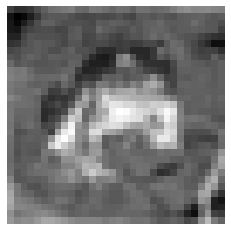

In [ ]:
extracted_benchmark = features_benchmark(one_image_data)

f1_benchmark = extracted_benchmark[0]

print('\n f1_benchmark shape:', f1_benchmark.shape)

imgs = f1_benchmark[0,...]

plt.imshow(imgs[...,0], cmap='gray')
plt.axis('off')
plt.show()

We can see that it matches our frog pal. Now, we can look at a deeper layer, after the first convolution:


 f2_benchmark shape: (1, 32, 32, 16)


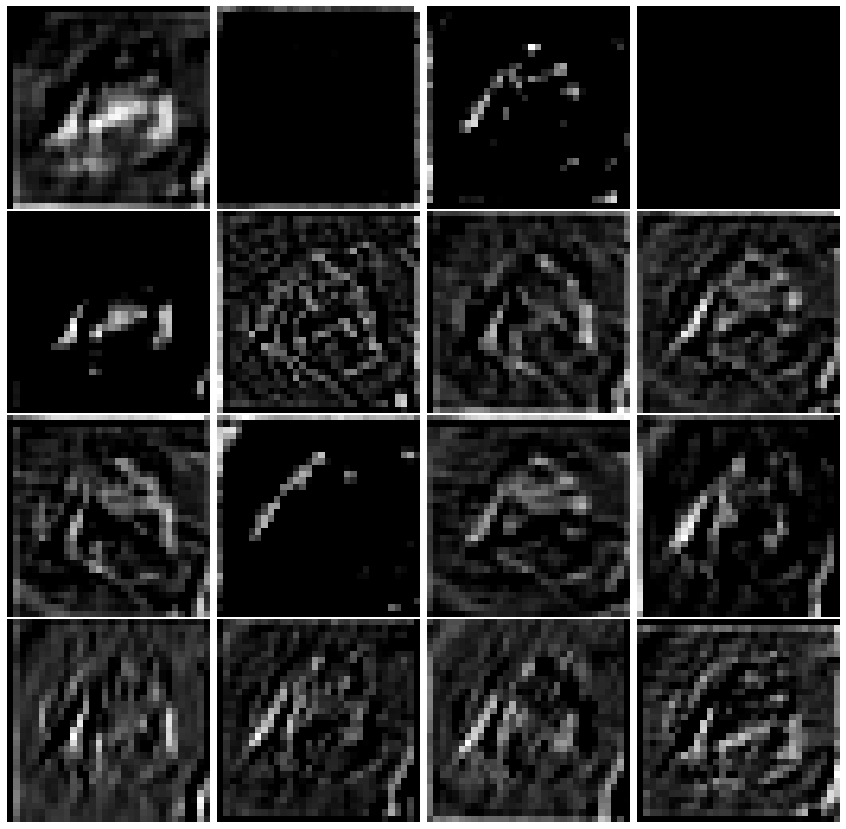

In [ ]:
f2_benchmark = extracted_benchmark[1]

print('\n f2_benchmark shape:', f2_benchmark.shape)

imgs = f2_benchmark[0,...]
plt.figure(figsize=(15,15))
for n in range(16):
    ax = plt.subplot(4, 4, n+1)
    plt.imshow(imgs[...,n], cmap='gray')
    plt.axis('off')
plt.subplots_adjust(wspace=0.01, hspace=0.01)

Since there are 16 filters on the convolutional layers, we observe 16 images as result of the first convolution. We already have a strong processing of the image, highlighting key aspects of the frog, like its eyes and paws.

We can look at a super deep layer now that will be heavily processed. Here we see the output of the last convolutional layer. At this stage, only the most meaningful pixels appear in the image, and the information contained is super non-redundant:


 f3_benchmark shape: (1, 8, 8, 64)


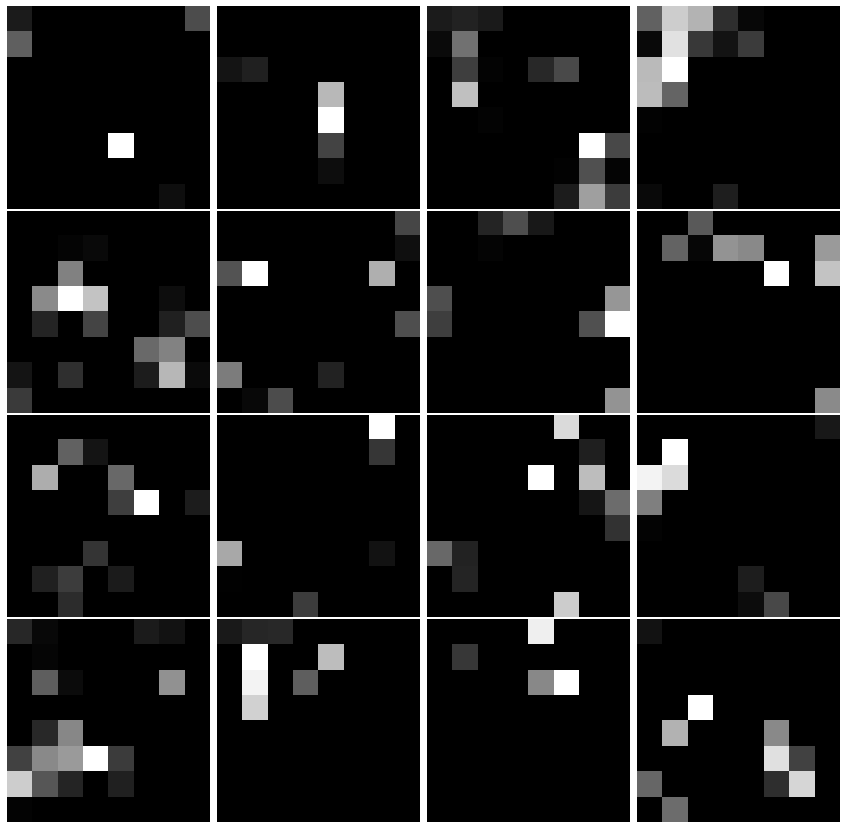

In [ ]:
f3_benchmark = extracted_benchmark[9]

print('\n f3_benchmark shape:', f3_benchmark.shape)

imgs = f3_benchmark[0,...]
plt.figure(figsize=(15,15))
for n in range(16):
    ax = plt.subplot(4, 4, n+1)
    plt.imshow(imgs[...,n], cmap='gray')
    plt.axis('off')
plt.subplots_adjust(wspace=0.01, hspace=0.01)

A nice thing to notice is the drastic reduction on the image size due to the poolings performed through the network. We can see how it affects interpretability of the images, since we can't recognize any trace of the initial frog.

Now, let's look the output of the model, as a probability distribution over the classes:

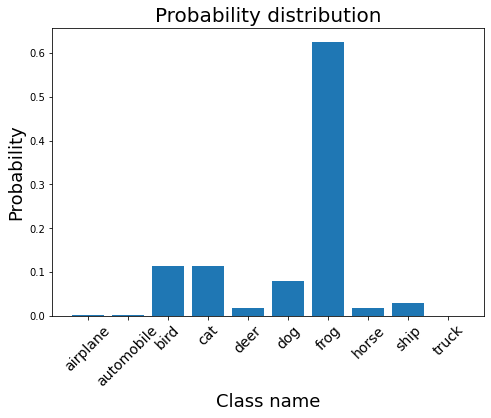

In [ ]:
fig = plt.figure(figsize=(6,4))
ax = fig.add_axes([0,0,1,1])
ax.bar(np.arange(0,10), model_benchmark.predict(one_image_data, verbose=False)[0])
ax.set_title('Probability distribution', fontsize=20)
ax.set_xticks(np.arange(0,10))
ax.set_xticklabels(class_names, rotation=45, fontsize=14)
ax.set_xlabel('Class name', fontsize=18)
ax.set_ylabel('Probability', fontsize=18)
plt.show()

## 6.3 Analysis of the dummy classifier

Now we turn ourselves to the dummy classifier. We expect that the feature selection in here will be much less tunned than the benchmark classifier. Since the process will be prety much the same as the benchmark, I will be brief with the comments.

In [ ]:
dummy_layers = model_dummy.layers
dummy_input = model_dummy.input

layer_outputs_dummy = [layer.output for layer in dummy_layers]
features_dummy = Model(inputs=dummy_input, outputs=layer_outputs_dummy)


 f1_dummy shape: (1, 32, 32, 1)


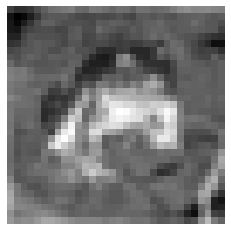

In [ ]:
extracted_dummy = features_dummy(one_image_data)

f1_dummy = extracted_dummy[0]

print('\n f1_dummy shape:', f1_dummy.shape)

imgs = f1_dummy[0,...]

plt.imshow(imgs[...,0], cmap='gray')
plt.axis('off')
plt.show()


 f2_dummy shape: (1, 32, 32, 16)


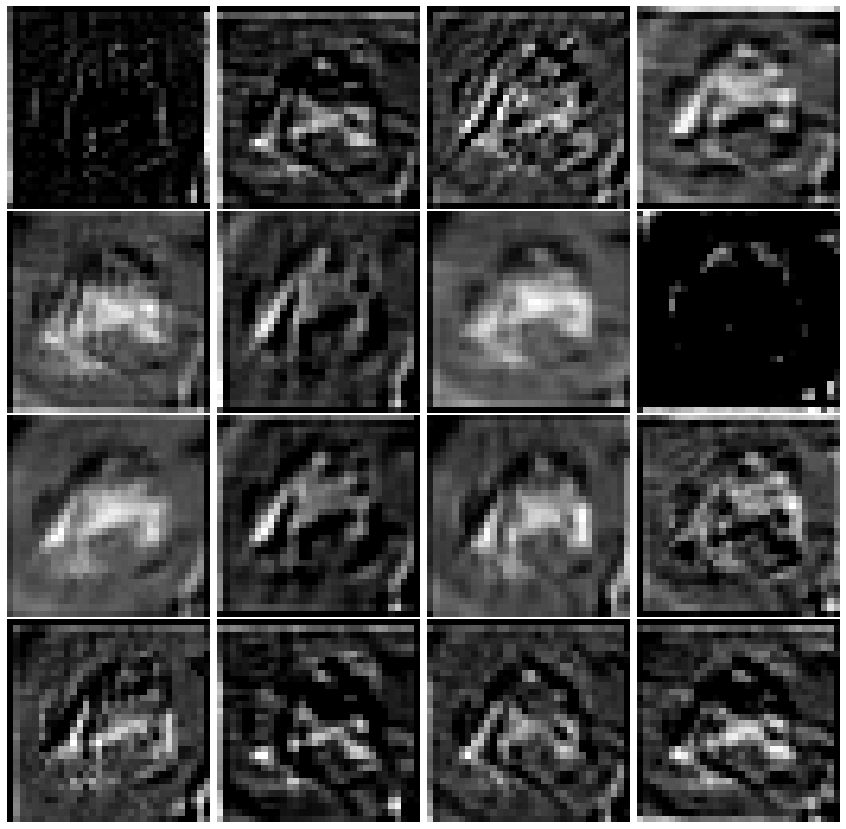

In [ ]:
f2_dummy = extracted_dummy[1]

print('\n f2_dummy shape:', f2_dummy.shape)

imgs = f2_dummy[0,...]
plt.figure(figsize=(15,15))
for n in range(16):
    ax = plt.subplot(4, 4, n+1)
    plt.imshow(imgs[...,n], cmap='gray')
    plt.axis('off')
plt.subplots_adjust(wspace=0.01, hspace=0.01)


 f3_dummy shape: (1, 8, 8, 64)


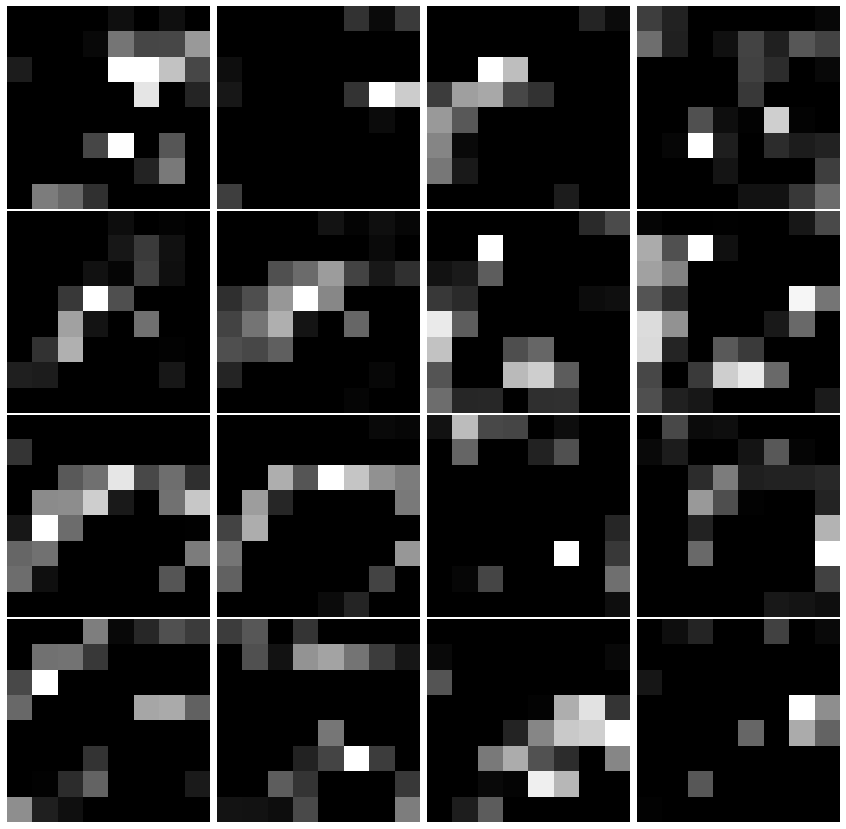

In [ ]:
f3_dummy = extracted_dummy[9]

print('\n f3_dummy shape:', f3_dummy.shape)

imgs = f3_dummy[0,...]
plt.figure(figsize=(15,15))
for n in range(16):
    ax = plt.subplot(4, 4, n+1)
    plt.imshow(imgs[...,n], cmap='gray')
    plt.axis('off')
plt.subplots_adjust(wspace=0.01, hspace=0.01)

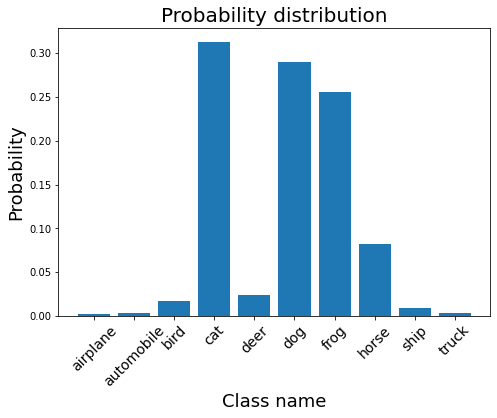

In [ ]:
fig = plt.figure(figsize=(6,4))
ax = fig.add_axes([0,0,1,1])
ax.bar(np.arange(0,10), model_dummy.predict(one_image_data, verbose=False)[0])
ax.set_title('Probability distribution', fontsize=20)
ax.set_xticks(np.arange(0,10))
ax.set_xticklabels(class_names, rotation=45, fontsize=14)
ax.set_xlabel('Class name', fontsize=18)
ax.set_ylabel('Probability', fontsize=18)
plt.show()

# 7. Conclusions and final thoughts

We can see that the processing degrees of the images are very different for the same slice of the network. Qualitative analysis indicates that the benchmark model is more aggressive when it comes to extracting useful information from the input. This is particularly evident from the first convolutional layer comparison: the frog image output is much less distorted and much more recognizable on the dummy than it is on the benchmark model.

Also, the plots from the probability distributions show that the benchmark model is accurate when predicting the frog class, while the dummy classifier has a less-peaked distribution profile, and also has its greatest value in the wrong class. After the last convolutional layer, we see more active pixels in the dummy classifier model, while most of the pixels of the benchmark are black. These observations lead to indications of worse feature extraction performance.

Further improvements to this analysis would be to use a dataset with larger images, with more pixels. This would allow us to see with more detail the feature extraction process. It wasn't possible to use larger images here, since the training process would take much longer.

Another approach would be to stablish a checkpoint routine to save the weights at every epoch of training, and use the best epoch as benchmark, while using earlier epochs as the dummy classifier. Although I believe that the results would be similar, it is something worth trying.

Finally, this project had the objective to look at qualitatively aspects of feature extraction, but it is possible to think about metrics that validate and make our reasonings more robust. Two immediate numerical analysis that come to my mind concern the last convolutional layer outputs:

1. To calculate the average color of the outputs from the last convolutional layer. We expect the benchmark to have an average value closer to zero (black).
2. To look at the correlation between the pixels. The correlation should be higher on the dummy classifier, since it (allegedly) contains more redundant information. 


# References

Some references I used through this work:

1. Manjunath Jogin, et al. "Feature Extraction using Convolution Neural Networks (CNN) and Deep Learning". 

2. Simonyan, Karen and Zisserman, Andrew. "Very Deep Convolution Networks for Large-Scale Image Recognition".

3. Zeiler, Matthew and Fergus, Rob. "Visualizing and Understanding Convolutional Networks".

4. Bodapati, Jyostna and Veeranjaneyulu, N. "Feature Extraction and Classification Using Deep Convolutional Neural Networks".

This were used as a theoretical background, as well as some implementation insights, specially at the architecture of the NN used. 